In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
device='cuda'if torch.cuda.is_available()else'cpu'

In [4]:
torch.manual_seed(1)
if device=='cuda':
    torch.cuda.manual_seed_all(1)

In [5]:
learning_rate=0.003
training_epoch=10
batch_size=100

In [6]:
mnist_train=dsets.MNIST(root='Data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='Data/',
                       train=True,
                       transform=transforms.ToTensor(),
                       download=True)

In [7]:
train_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)
test_loader=torch.utils.data.DataLoader(dataset=mnist_test,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        drop_last=True)

In [8]:
linear1=torch.nn.Linear(784,256,bias=True)
linear2=torch.nn.Linear(256,30,bias=True)
linear3=torch.nn.Linear(30,10,bias=True)
relu=torch.nn.ReLU()
bn1=torch.nn.BatchNorm1d(256)
bn2=torch.nn.BatchNorm1d(30)

linear4=torch.nn.Linear(784,256,bias=True)
linear5=torch.nn.Linear(256,30,bias=True)
linear6=torch.nn.Linear(30,10,bias=True)

In [9]:
model1=torch.nn.Sequential(linear1,bn1,relu,
                          linear2,bn2,relu,
                          linear3,relu)
model2=torch.nn.Sequential(linear4,relu,
                           linear5,relu,
                           linear6)

In [10]:
criterion=torch.nn.CrossEntropyLoss().to(device)
optimizer1=torch.optim.Adam(model1.parameters(),lr=learning_rate)
optimizer2=torch.optim.Adam(model2.parameters(),lr=learning_rate)

In [11]:
train_loss=[]
train_accu=[]
valid_loss=[]
valid_accu=[]
train_totalBatch=len(train_loader)
test_totalBatch=len(test_loader)
for epoch in range(training_epoch+1):
    model1.train()
    for X,Y in train_loader:
        X=X.view(-1,784).to(device)
        Y=Y.to(device)
        
        hypothesis1=model1(X)
        cost1=criterion(hypothesis1,Y)
        optimizer1.zero_grad()
        cost1.backward()
        optimizer1.step()
        
        hypothesis2=model2(X)
        cost2=criterion(hypothesis2,Y)
        optimizer2.zero_grad()
        cost2.backward()
        optimizer2.step()
    with torch.no_grad():
        model1.eval()
        loss1=0
        loss2=0
        accuracy1=0
        accuracy2=0
            
        for X,Y in train_loader:
            
            X=X.view(-1,784).to(device)
            Y=Y.to(device)
            
            prediction1=model1(X)
            correct_pre1=torch.argmax(prediction1,1)==Y
            loss1+=criterion(prediction1,Y)
            accuracy1+=correct_pre1.float().mean()
            
            prediction2=model2(X)
            correct_pre2=torch.argmax(prediction2,1)==Y
            loss2+=criterion(prediction2,Y)
            accuracy2+=correct_pre2.float().mean()
            
        loss1=loss1/train_totalBatch
        loss2=loss2/train_totalBatch
        accuracy1=accuracy1/train_totalBatch
        accuracy2=accuracy2/train_totalBatch
            
        train_loss.append([loss1,loss2])
        train_accu.append([accuracy1,accuracy2])
        print(
            '[Epoch %d-TRAIN] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            epoch, loss1.item(), accuracy1.item(), loss2.item(), accuracy2.item()))
            
        loss1=0
        loss2=0
        accuracy1=0
        accuracy2=0
        for X,Y in test_loader:
            
            X=X.view(-1,784).to(device)
            Y=Y.to(device)
            
            prediction1=model1(X)
            correct_pre1=torch.argmax(prediction1,1)==Y
            loss1+=criterion(prediction1,Y)
            accuracy1+=correct_pre1.float().mean()
            
            prediction2=model2(X)
            correct_pre2=torch.argmax(prediction2,1)==Y
            loss2+=criterion(prediction2,Y)
            accuracy2+=correct_pre2.float().mean()
            
        loss1=loss1/test_totalBatch
        loss2=loss2/test_totalBatch
        accuracy1=accuracy1/test_totalBatch
        accuracy2=accuracy2/test_totalBatch
            
        valid_loss.append([loss1,loss2])
        valid_accu.append([accuracy1,accuracy2])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
            epoch, loss1.item(), accuracy1.item(), loss2.item(), accuracy2.item()))
        print()
print("Learning finished!")

[Epoch 0-TRAIN] Batchnorm Loss(Acc): bn_loss:0.07645(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.11038(nn_acc:0.97)
[Epoch 0-VALID] Batchnorm Loss(Acc): bn_loss:0.07645(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.11038(nn_acc:0.97)

[Epoch 1-TRAIN] Batchnorm Loss(Acc): bn_loss:0.03824(bn_acc:0.99) vs No Batchnorm Loss(Acc): nn_loss:0.06139(nn_acc:0.98)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.03824(bn_acc:0.99) vs No Batchnorm Loss(Acc): nn_loss:0.06139(nn_acc:0.98)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): bn_loss:0.03154(bn_acc:0.99) vs No Batchnorm Loss(Acc): nn_loss:0.05296(nn_acc:0.98)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.03154(bn_acc:0.99) vs No Batchnorm Loss(Acc): nn_loss:0.05296(nn_acc:0.98)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): bn_loss:0.02632(bn_acc:0.99) vs No Batchnorm Loss(Acc): nn_loss:0.04341(nn_acc:0.99)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.02632(bn_acc:0.99) vs No Batchnorm Loss(Acc): nn_loss:0.04341(nn_acc:0.99)

[Epoch 4-TRAIN] Batc

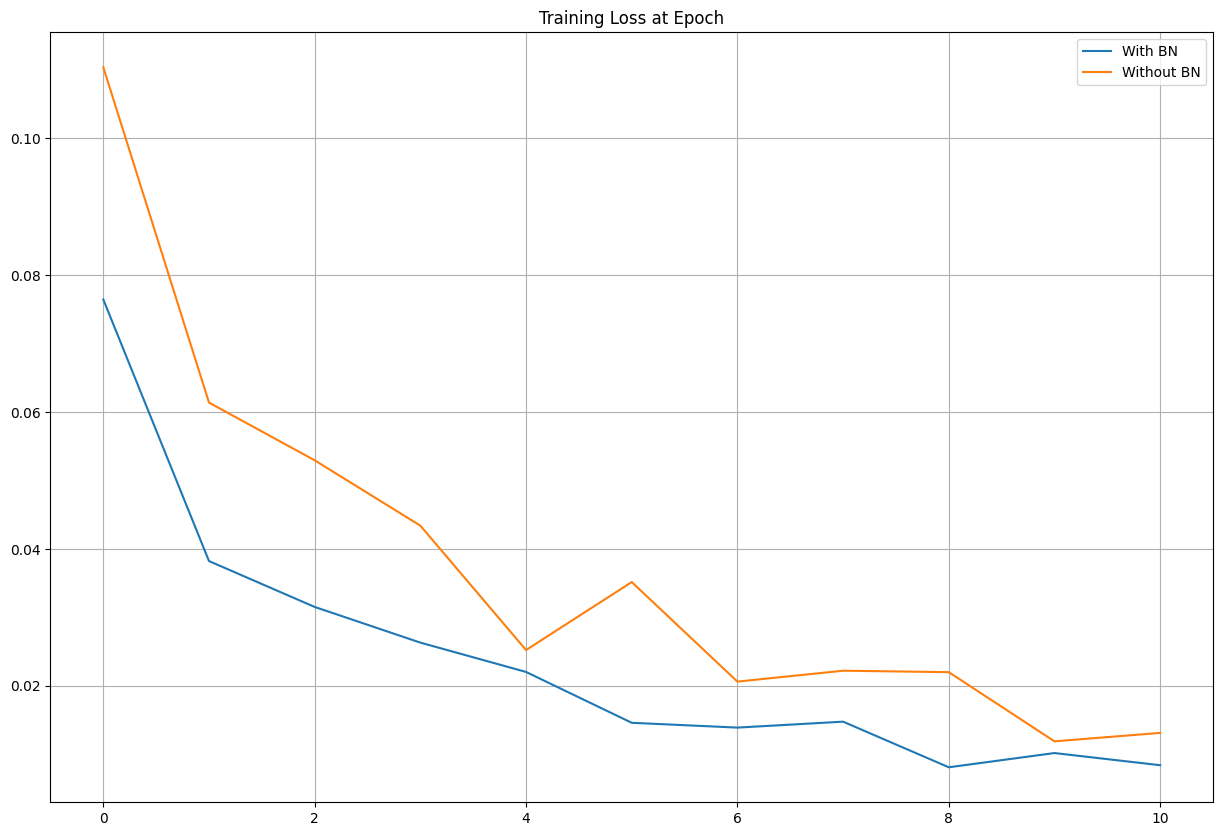

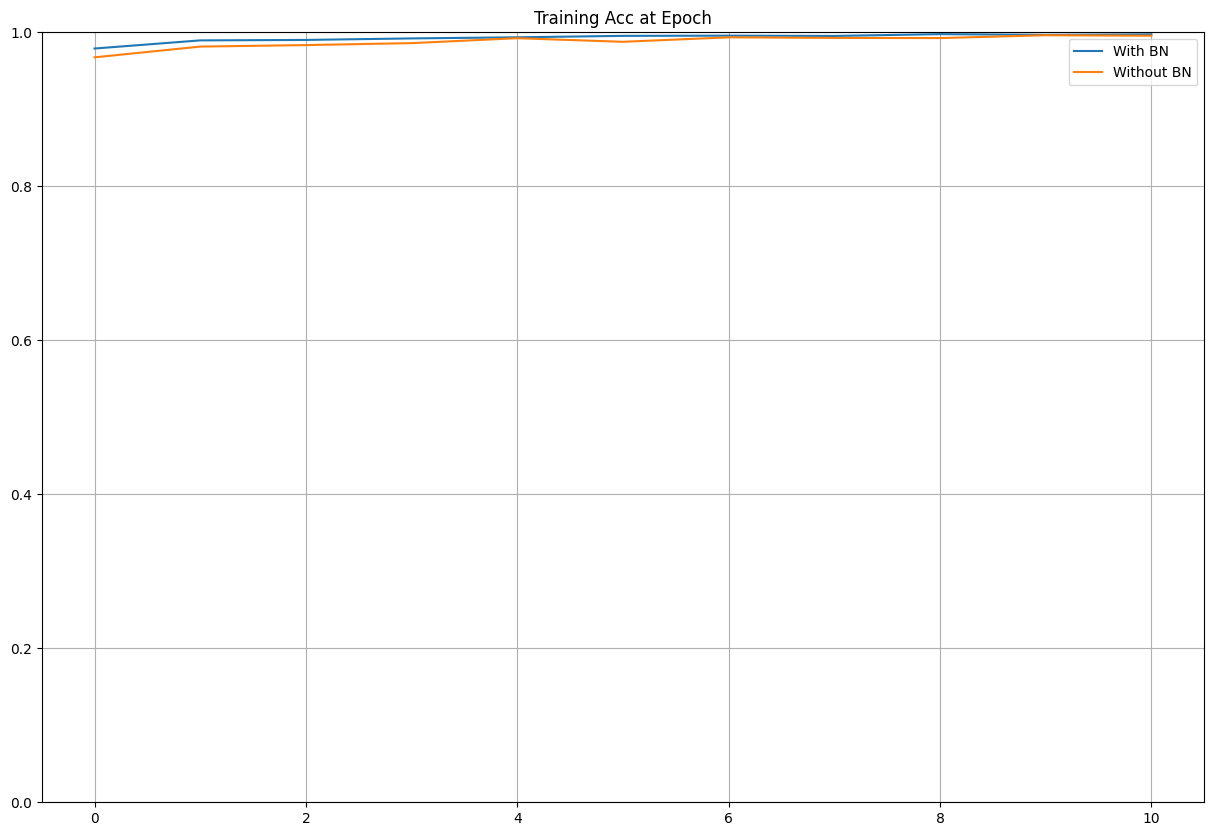

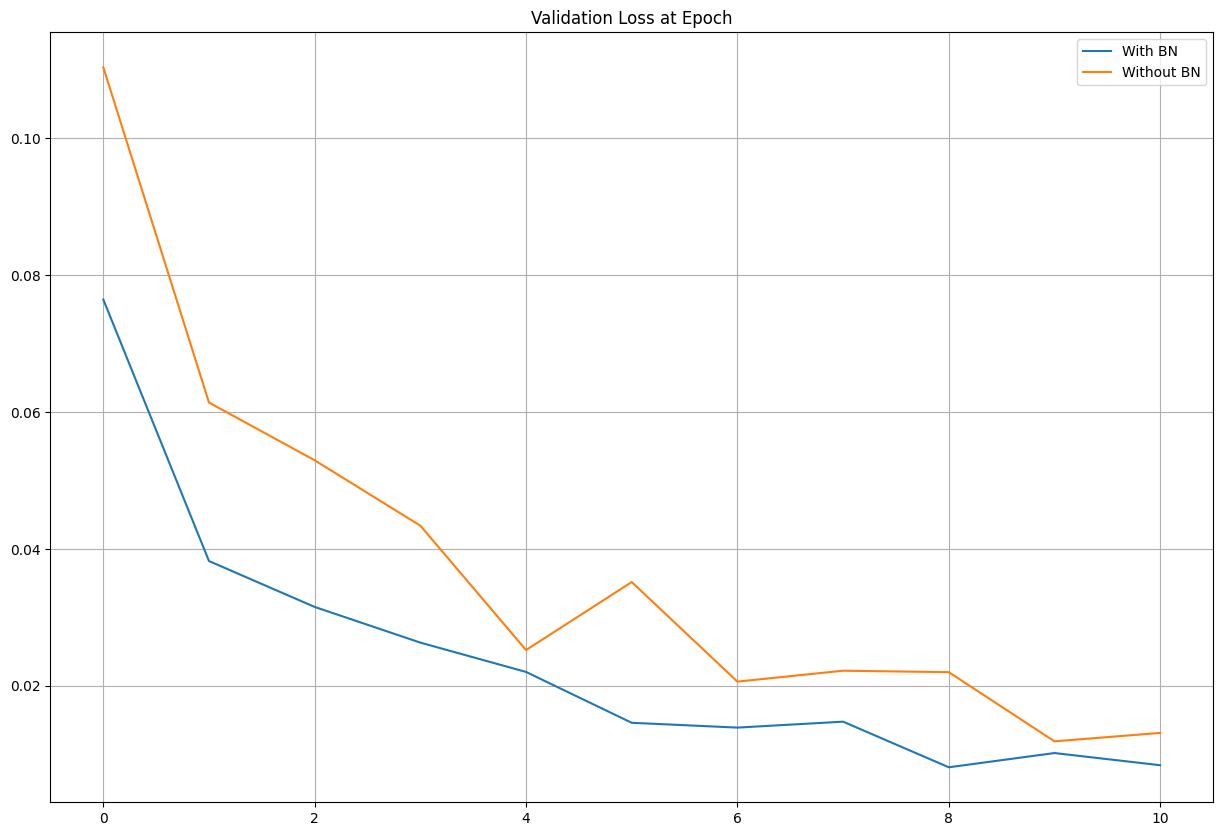

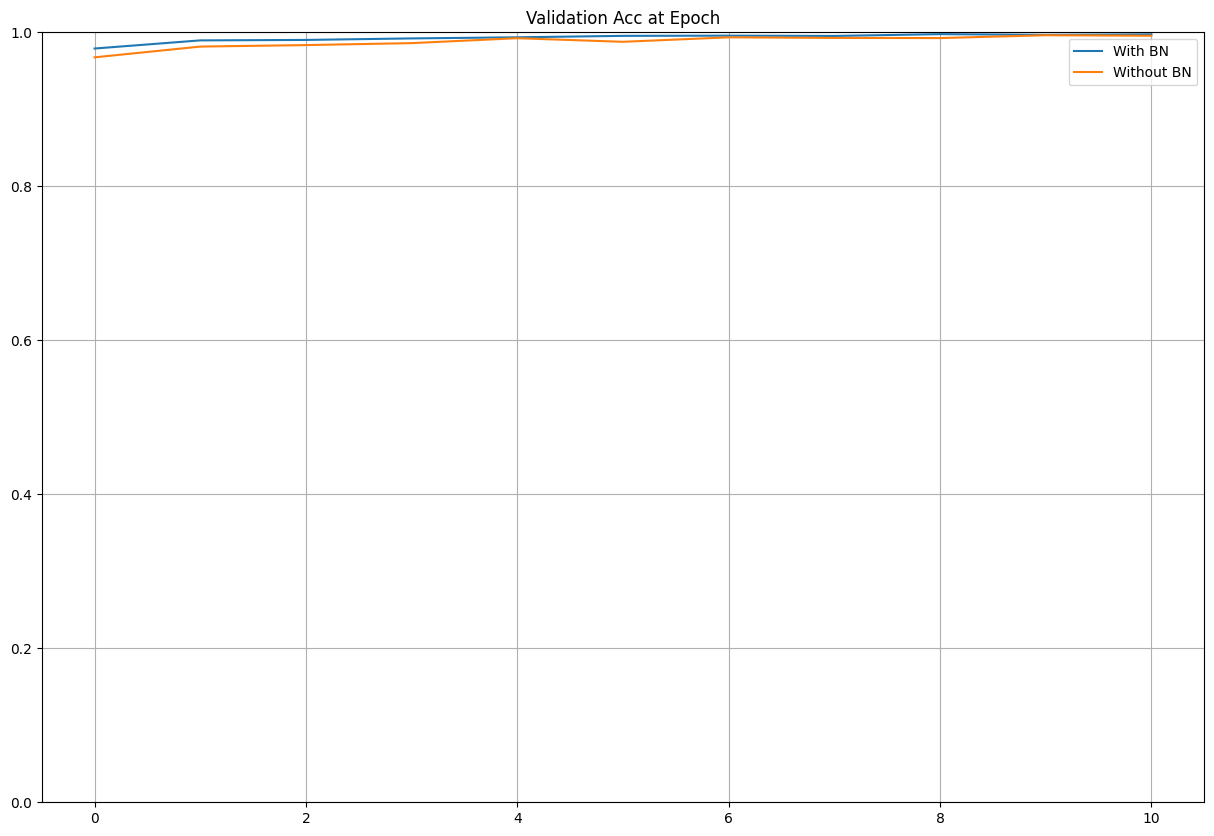

In [12]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)

    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')
    plt.show()
plot_compare(train_loss, title='Training Loss at Epoch')
plot_compare(train_accu, [0, 1.0], title='Training Acc at Epoch')
plot_compare(valid_loss, title='Validation Loss at Epoch')
plot_compare(valid_accu, [0, 1.0], title='Validation Acc at Epoch')